# Will the Telcom Customer Churn?- A Classification Analysis

# Authors: Rajdeep Saha & Soumik Karmakar

In [1]:
rm(list=ls())
set.seed(1)
library(ggplot2)
library(leaps)
library(caret)
library(car)
library(corrplot)
library(tree)
library(MASS)
library(randomForest)
library(pROC)

Loading required package: lattice

Loading required package: carData

corrplot 0.89 loaded

randomForest 4.6-14

Type rfNews() to see new features/changes/bug fixes.


Attaching package: 'randomForest'


The following object is masked from 'package:ggplot2':

    margin


Type 'citation("pROC")' for a citation.


Attaching package: 'pROC'


The following objects are masked from 'package:stats':

    cov, smooth, var




# Data Access

In [2]:
df <- read.csv('C:/Users/user/OneDrive/Desktop/Self Project/WA_Fn-UseC_-Telco-Customer-Churn.csv')
head(df)
dim(df)
str(df)
n <- nrow(df)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
,<chr>,<chr>,<int>,<chr>,<chr>,<int>,<chr>,<chr>,<chr>,<chr>,...,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<chr>
1,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
2,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
3,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
4,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
5,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
6,9305-CDSKC,Female,0,No,No,8,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.50,Yes


[1] 7043   21

'data.frame':	7043 obs. of  21 variables:
 $ customerID      : chr  "7590-VHVEG" "5575-GNVDE" "3668-QPYBK" "7795-CFOCW" ...
 $ gender          : chr  "Female" "Male" "Male" "Male" ...
 $ SeniorCitizen   : int  0 0 0 0 0 0 0 0 0 0 ...
 $ Partner         : chr  "Yes" "No" "No" "No" ...
 $ Dependents      : chr  "No" "No" "No" "No" ...
 $ tenure          : int  1 34 2 45 2 8 22 10 28 62 ...
 $ PhoneService    : chr  "No" "Yes" "Yes" "No" ...
 $ MultipleLines   : chr  "No phone service" "No" "No" "No phone service" ...
 $ InternetService : chr  "DSL" "DSL" "DSL" "DSL" ...
 $ OnlineSecurity  : chr  "No" "Yes" "Yes" "Yes" ...
 $ OnlineBackup    : chr  "Yes" "No" "Yes" "No" ...
 $ DeviceProtection: chr  "No" "Yes" "No" "Yes" ...
 $ TechSupport     : chr  "No" "No" "No" "Yes" ...
 $ StreamingTV     : chr  "No" "No" "No" "No" ...
 $ StreamingMovies : chr  "No" "No" "No" "No" ...
 $ Contract        : chr  "Month-to-month" "One year" "Month-to-month" "One year" ...
 $ PaperlessBilling: chr  "Yes"

# Data Preprocessing

In [3]:
#id column remove
colnames(df)
df <- df[-which(colnames(df) == 'customerID')]
head(df)

[1] "customerID"       "gender"           "SeniorCitizen"    "Partner"         
 [5] "Dependents"       "tenure"           "PhoneService"     "MultipleLines"   
 [9] "InternetService"  "OnlineSecurity"   "OnlineBackup"     "DeviceProtection"
[13] "TechSupport"      "StreamingTV"      "StreamingMovies"  "Contract"        
[17] "PaperlessBilling" "PaymentMethod"    "MonthlyCharges"   "TotalCharges"    
[21] "Churn"

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
,<chr>,<int>,<chr>,<chr>,<int>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<chr>
1,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
2,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
3,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
4,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
5,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
6,Female,0,No,No,8,Yes,Yes,Fiber optic,No,No,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.50,Yes


In [4]:
#missing value imputation
df$TotalCharges <- as.numeric(df$TotalCharges)
miss = which(is.na(df$TotalCharges) == TRUE)
df$TotalCharges[miss] <- median(df$TotalCharges, na.rm = TRUE) 
str(df)

'data.frame':	7043 obs. of  20 variables:
 $ gender          : chr  "Female" "Male" "Male" "Male" ...
 $ SeniorCitizen   : int  0 0 0 0 0 0 0 0 0 0 ...
 $ Partner         : chr  "Yes" "No" "No" "No" ...
 $ Dependents      : chr  "No" "No" "No" "No" ...
 $ tenure          : int  1 34 2 45 2 8 22 10 28 62 ...
 $ PhoneService    : chr  "No" "Yes" "Yes" "No" ...
 $ MultipleLines   : chr  "No phone service" "No" "No" "No phone service" ...
 $ InternetService : chr  "DSL" "DSL" "DSL" "DSL" ...
 $ OnlineSecurity  : chr  "No" "Yes" "Yes" "Yes" ...
 $ OnlineBackup    : chr  "Yes" "No" "Yes" "No" ...
 $ DeviceProtection: chr  "No" "Yes" "No" "Yes" ...
 $ TechSupport     : chr  "No" "No" "No" "Yes" ...
 $ StreamingTV     : chr  "No" "No" "No" "No" ...
 $ StreamingMovies : chr  "No" "No" "No" "No" ...
 $ Contract        : chr  "Month-to-month" "One year" "Month-to-month" "One year" ...
 $ PaperlessBilling: chr  "Yes" "No" "Yes" "No" ...
 $ PaymentMethod   : chr  "Electronic check" "Mailed check" "

In [5]:
#No Service to No
for(i in (which(colnames(df) == 'OnlineSecurity') : which(colnames(df) == 'StreamingMovies'))){
  df[i] <- as.factor(ifelse(df[i] != 'Yes', 'No', 'Yes'))
}
df$InternetService <- as.factor(ifelse(df$InternetService != 'No', 'Yes', 'No'))
df$MultipleLines <- as.factor(ifelse(df$MultipleLines != 'Yes', 'No', 'Yes'))
df$SeniorCitizen <- as.factor(df$SeniorCitizen)

for(i in 1:ncol(df)){
  if(class(df[,i]) == 'character'){
    df[,i] <- as.factor(df[,i])
  }
}
str(df)

'data.frame':	7043 obs. of  20 variables:
 $ gender          : Factor w/ 2 levels "Female","Male": 1 2 2 2 1 1 2 1 1 2 ...
 $ SeniorCitizen   : Factor w/ 2 levels "0","1": 1 1 1 1 1 1 1 1 1 1 ...
 $ Partner         : Factor w/ 2 levels "No","Yes": 2 1 1 1 1 1 1 1 2 1 ...
 $ Dependents      : Factor w/ 2 levels "No","Yes": 1 1 1 1 1 1 2 1 1 2 ...
 $ tenure          : int  1 34 2 45 2 8 22 10 28 62 ...
 $ PhoneService    : Factor w/ 2 levels "No","Yes": 1 2 2 1 2 2 2 1 2 2 ...
 $ MultipleLines   : Factor w/ 2 levels "No","Yes": 1 1 1 1 1 2 2 1 2 1 ...
 $ InternetService : Factor w/ 2 levels "No","Yes": 2 2 2 2 2 2 2 2 2 2 ...
 $ OnlineSecurity  : Factor w/ 2 levels "No","Yes": 1 2 2 2 1 1 1 2 1 2 ...
 $ OnlineBackup    : Factor w/ 2 levels "No","Yes": 2 1 2 1 1 1 2 1 1 2 ...
 $ DeviceProtection: Factor w/ 2 levels "No","Yes": 1 2 1 2 1 2 1 1 2 1 ...
 $ TechSupport     : Factor w/ 2 levels "No","Yes": 1 1 1 2 1 1 1 1 2 1 ...
 $ StreamingTV     : Factor w/ 2 levels "No","Yes": 1 1 1 1 1 2 

# Exploratory Data Analysis

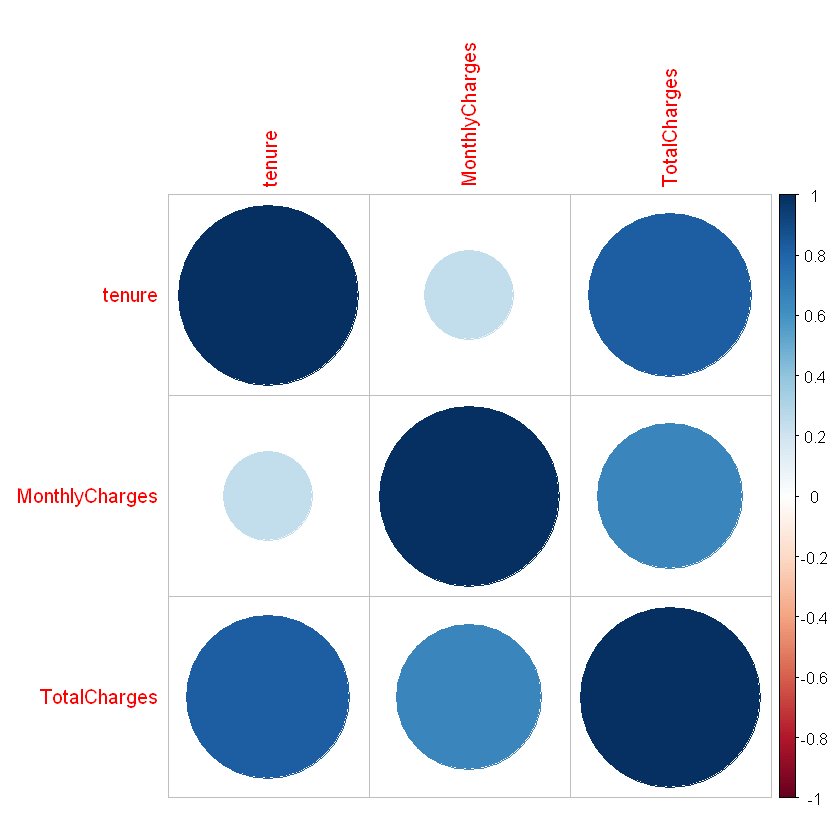

In [6]:
#Correlation between numeric variables
cr <-cor(df[,c(5,18,19)])
corrplot(cr, method="circle")

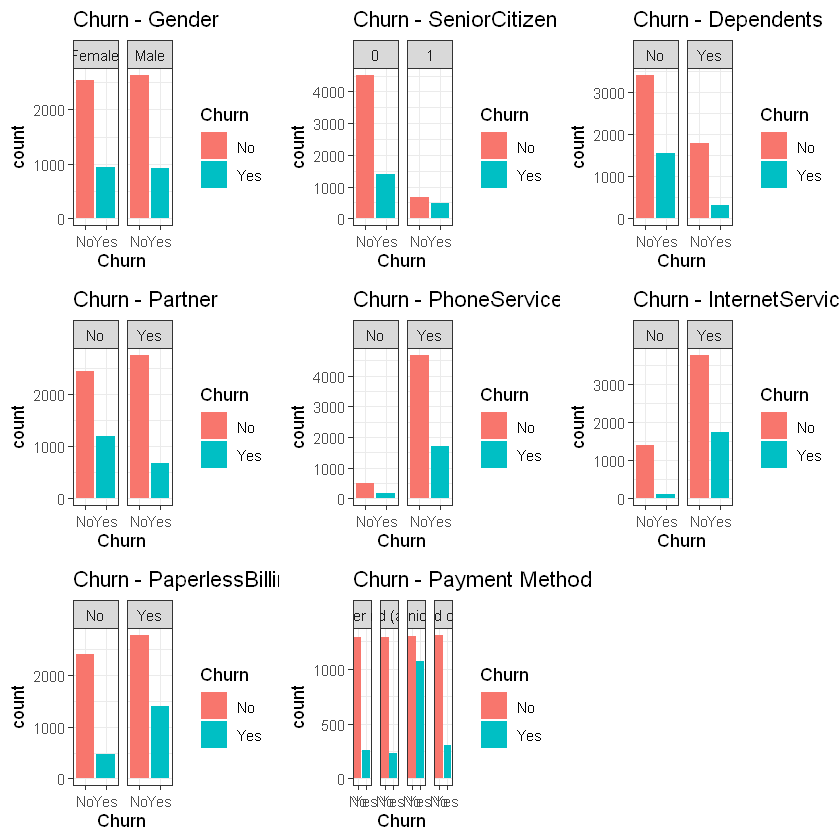

In [7]:
p1 <- ggplot(df, aes(x = Churn, fill = Churn)) +facet_grid(~gender)+ geom_bar() +ggtitle("Churn - Gender") + theme_bw()
p2 <- ggplot(df, aes(x = Churn, fill = Churn)) +facet_grid(~SeniorCitizen)+ geom_bar() + ggtitle("Churn - SeniorCitizen") + theme_bw()
p3 <- ggplot(df, aes(x = Churn, fill = Churn)) +facet_grid(~Dependents)+ geom_bar() + ggtitle("Churn - Dependents") + theme_bw()
p4 <- ggplot(df, aes(x = Churn, fill = Churn)) +facet_grid(~Partner)+ geom_bar() + ggtitle("Churn - Partner") + theme_bw()
p5 <- ggplot(df, aes(x = Churn, fill = Churn)) +facet_grid(~PhoneService)+ geom_bar() + ggtitle("Churn - PhoneService")+ theme_bw()
p6 <- ggplot(df, aes(x = Churn, fill = Churn)) +facet_grid(~InternetService)+ geom_bar() + ggtitle("Churn - InternetService") + theme_bw()
p7 <- ggplot(df, aes(x = Churn, fill = Churn)) +facet_grid(~PaperlessBilling)+ geom_bar() + ggtitle("Churn - PaperlessBilling") + theme_bw()
p8 <- ggplot(df, aes(x = Churn, fill = Churn)) +facet_grid(~PaymentMethod)+ geom_bar() + ggtitle("Churn - Payment Method") + theme_bw()
ggpubr::ggarrange(p1,p2,p3,p4,p5,p6,p7,p8, nrow = 3, ncol = 3)

# Dummification

In [8]:
attach(df)
to_dummy <- data.frame(Contract,PaymentMethod)
dmy <- dummyVars(" ~ .", data = to_dummy)
df2 <- data.frame(predict(dmy, newdata = to_dummy))
df2 <- df2[, !(colnames(df2) %in% c("Contract.Month.to.month", "PaymentMethod.Bank.transfer..automatic."))]
df <- df[,!(colnames(df) %in% c("Contract","PaymentMethod","TotalCharges"))]
df <- cbind(df, df2)
head(df)
attach(df)
dim(df)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,...,StreamingTV,StreamingMovies,PaperlessBilling,MonthlyCharges,Churn,Contract.One.year,Contract.Two.year,PaymentMethod.Credit.card..automatic.,PaymentMethod.Electronic.check,PaymentMethod.Mailed.check
,<fct>,<fct>,<fct>,<fct>,<int>,<fct>,<fct>,<fct>,<fct>,<fct>,...,<fct>,<fct>,<fct>,<dbl>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,Female,0,Yes,No,1,No,No,Yes,No,Yes,...,No,No,Yes,29.85,No,0,0,0,1,0
2,Male,0,No,No,34,Yes,No,Yes,Yes,No,...,No,No,No,56.95,No,1,0,0,0,1
3,Male,0,No,No,2,Yes,No,Yes,Yes,Yes,...,No,No,Yes,53.85,Yes,0,0,0,0,1
4,Male,0,No,No,45,No,No,Yes,Yes,No,...,No,No,No,42.30,No,1,0,0,0,0
5,Female,0,No,No,2,Yes,No,Yes,No,No,...,No,No,Yes,70.70,Yes,0,0,0,1,0
6,Female,0,No,No,8,Yes,Yes,Yes,No,No,...,Yes,Yes,Yes,99.65,Yes,0,0,0,1,0


The following objects are masked from df (pos = 3):

    Churn, Dependents, DeviceProtection, gender, InternetService,
    MonthlyCharges, MultipleLines, OnlineBackup, OnlineSecurity,
    PaperlessBilling, Partner, PhoneService, SeniorCitizen,
    StreamingMovies, StreamingTV, TechSupport, tenure




[1] 7043   22

# Feature Selection

[1] "which"  "rsq"    "rss"    "adjr2"  "cp"     "bic"    "outmat" "obj"

[1] 12

[1] "SeniorCitizen1"                 "tenure"                        
 [3] "PhoneServiceYes"                "OnlineSecurityYes"             
 [5] "OnlineBackupYes"                "DeviceProtectionYes"           
 [7] "TechSupportYes"                 "PaperlessBillingYes"           
 [9] "MonthlyCharges"                 "Contract.One.year"             
[11] "Contract.Two.year"              "PaymentMethod.Electronic.check"

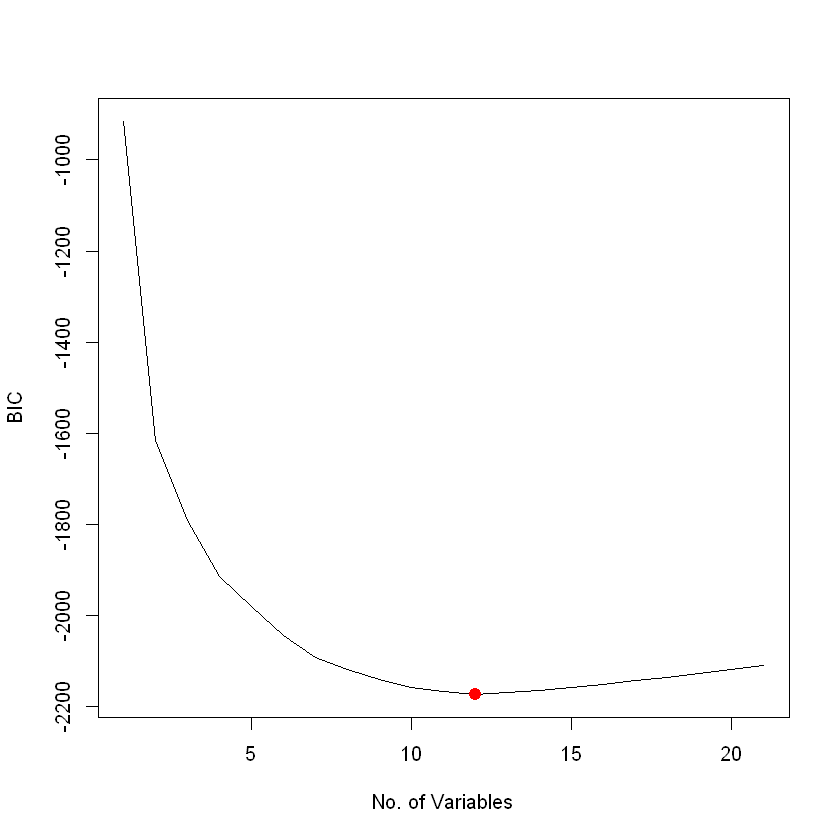

In [9]:
regfit.full=regsubsets(Churn~.,data=df,nvmax=21)
reg.summary=summary(regfit.full)
names(reg.summary)
which.min(reg.summary$bic)
plot(reg.summary$bic,xlab="No. of Variables",ylab=expression(paste("BIC")),type="l")
points(12,reg.summary$bic[12],col="red",cex=2,pch=20)
names(coef(regfit.full,12))[-1]

# Final Dataset for Analysis

In [10]:
data=df[,-c(1,3,4,7,8,13,14,20,22)]
dim(data)

[1] 7043   13

# Train-Cross Validation-Test Split

In [11]:
index1=sample(1:nrow(data),floor(0.7*nrow(data)))
train=data[index1,]
remaining=data[-index1,]
index2=sample(1:nrow(remaining),floor(2/3*nrow(remaining)))
crossval=remaining[index2,]
test=remaining[-index2,]
actual_churn=crossval$Churn

# Logistic Regression

In [12]:
logistic.fit=glm(Churn~.,data=train,family="binomial")
logistic.predict=rep("No",nrow(crossval))
predicted_prob=predict(logistic.fit,newdata=crossval,type="response")
logistic.predict[predicted_prob>0.5]="Yes"
table(logistic.predict,actual_churn)
mean(logistic.predict==actual_churn)

                actual_churn
logistic.predict  No Yes
             No  938 169
             Yes 100 201

[1] 0.8089489

# Linear Discriminant Analysis

In [13]:
lda.fit=lda(Churn~.,data=train)
lda.predict=predict(lda.fit,crossval)$class
table(lda.predict,actual_churn)
mean(lda.predict==actual_churn)

           actual_churn
lda.predict  No Yes
        No  930 169
        Yes 108 201

[1] 0.803267

# Decision Tree Classifier


Classification tree:
tree(formula = Churn ~ ., data = train, method = "class")
Variables actually used in tree construction:
[1] "Contract.Two.year"              "Contract.One.year"             
[3] "PaymentMethod.Electronic.check" "tenure"                        
[5] "MonthlyCharges"                
Number of terminal nodes:  8 
Residual mean deviance:  0.8856 = 4359 / 4922 
Misclassification error rate: 0.2152 = 1061 / 4930 

               actual_churn
predicted_churn  No Yes
            No  920 226
            Yes 118 144

[1] 0.7556818

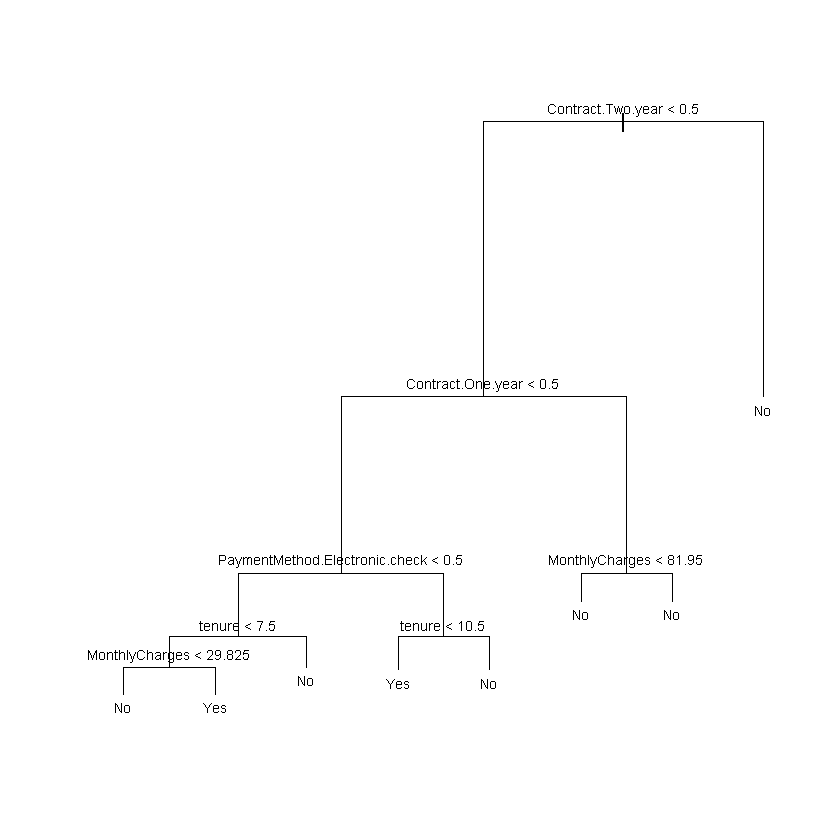

In [14]:
tree.fit=tree(Churn~.,train,method="class")
summary(tree.fit)
plot(tree.fit)
text(tree.fit,pretty=0,cex=0.7)
text(tree.fit,pretty=0,cex=0.7)
tree.predict=predict(tree.fit,crossval,type="class")
table(predicted_churn=tree.predict,actual_churn)
mean(tree.predict==actual_churn)

# Random Forest Classifier

In [15]:
rf.fit=randomForest(Churn~.,data=train,ntree=200,mtry=4)
rf.predict=predict(rf.fit,crossval)
table(predicted_churn=rf.predict,actual_churn)
mean(rf.predict==actual_churn)

               actual_churn
predicted_churn  No Yes
            No  917 178
            Yes 121 192

[1] 0.787642

# Misclassification Error Rate for Each Model

In [16]:
misclassification_rate_logistic=(mean(logistic.predict!=actual_churn))*100
misclassification_rate_lda=(mean(lda.predict!=actual_churn))*100
misclassification_rate_tree=(mean(tree.predict!=actual_churn))*100
misclassification_rate_forest=(mean(rf.predict!=actual_churn))*100
paste("Misclassification Error Rate for Logistic Regression is",misclassification_rate_logistic,"%")
paste("Misclassification Error Rate for Linear Discriminant Analysis is is",misclassification_rate_lda,"%")
paste("Misclassification Error Rate for Decision Tree is",misclassification_rate_tree,"%")
paste("Misclassification Error Rate for Random Forest is",misclassification_rate_forest,"%")

[1] "Misclassification Error Rate for Logistic Regression is 19.1051136363636 %"

[1] "Misclassification Error Rate for Linear Discriminant Analysis is is 19.6732954545455 %"

[1] "Misclassification Error Rate for Decision Tree is 24.4318181818182 %"

[1] "Misclassification Error Rate for Random Forest is 21.2357954545455 %"

# Suggested Model

 Logistic Regression

# Fitting on Test Dataset

In [17]:
predicted_prob=predict(logistic.fit,newdata=test,type="response")
logistic.predict.test=rep("No",nrow(test))
logistic.predict.test[predicted_prob>0.5]="Yes"
actual.churn.test=test$Churn
table(logistic.predict.test,actual.churn.test)
misclassification.final=mean(logistic.predict.test!=actual.churn.test)*100
paste("Misclassification Error Rate for final model is",misclassification.final,"%")

                     actual.churn.test
logistic.predict.test  No Yes
                  No  474  72
                  Yes  56 103

[1] "Misclassification Error Rate for final model is 18.1560283687943 %"

Setting levels: control = No, case = Yes

Setting direction: controls < cases



Area under the curve: 0.8427

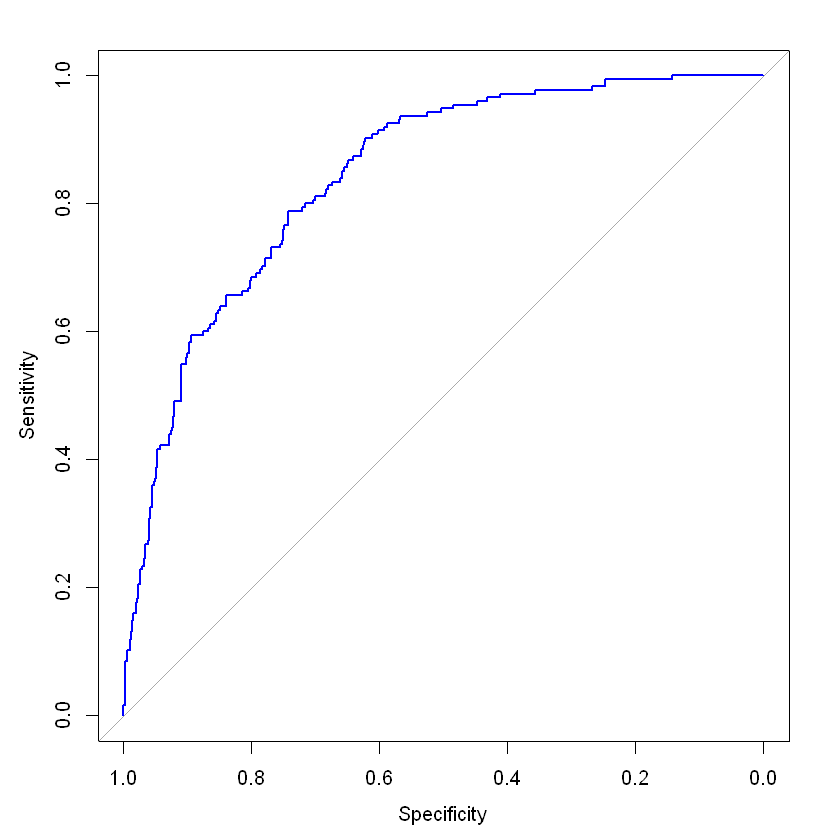

In [18]:
#Assessing final model accuracy via ROC curve
ROC=roc(actual.churn.test,predicted_prob)
plot(ROC,col="blue")
auc(ROC)